In [92]:
import numpy as np
import scipy.signal as signal
import pandas as pd
import wfdb
from wfdb import processing
import glob
from natsort import natsorted
import matplotlib.pyplot as plt
import pprint

In [93]:
search_path = '../data/*'
path_list = natsorted(glob.glob(search_path))
ecg_raw_df = pd.read_table(path_list[0], header=None, skiprows=13)[0]
ecg_raw_df.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: 0, dtype: float64

In [96]:
def butter_bandpass(lowcut, highcut, fs, order=4):
    # to gain paramaters of butterworth bandpass filter 
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = signal.butter(order, [low, high], btype='band')
    return b, a

def apply_filter_to_signal(sig, lowcut, highcut, fs, order=4):
    # apply butterworth bandpass filter to the signal
    b, a = butter_bandpass(lowcut, highcut, fs, order)
    filtered = signal.filtfilt(b, a, sig)
    return filtered

def plot_lorenz(rri):
    y = np.roll(rri, -1)[:-1]
    x = rri[:-1]
    plt.scatter(y, x)

Fs = 1000 # [Hz]
# High cht freq: 30 [Hz]
nyq = Fs / 2

ecg_signal = ecg_raw_df.values
ecg_signal = apply_filter_to_signal(ecg_signal, 0.3, 60, fs=Fs)


In [98]:
ecg_signal = signal.resample(ecg_signal, (len(ecg_signal) // Fs) * 128)
Fs = 128

ecg_conv = ecg_signal[10*Fs:570*Fs]
ecg_relax = ecg_signal[700*Fs:]

Initializing using default parameters
Running QRS detection...
QRS detection complete.


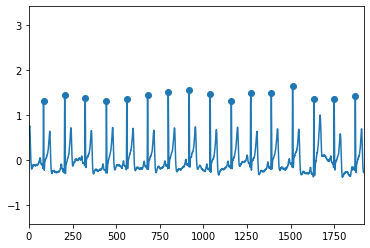

Initializing using default parameters
Running QRS detection...
QRS detection complete.


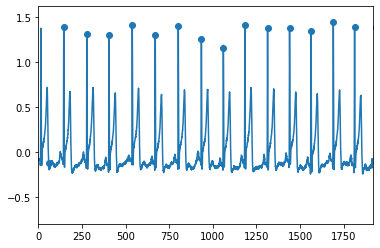

In [150]:
conf = processing.XQRS.Conf(ref_period=0.4)

xqrs = processing.XQRS(sig=ecg_conv, fs=Fs, conf=conf)
xqrs.detect(learn=False)
peaks_conv = xqrs.qrs_inds / Fs
RRI_conv = np.diff(peaks_conv)
plt.plot(ecg_conv)
plt.scatter(xqrs.qrs_inds, ecg_conv[xqrs.qrs_inds])
plt.xlim([0, 15*Fs])
plt.show()

xqrs = processing.XQRS(sig=ecg_relax, fs=Fs, conf=conf)
xqrs.detect(learn=False)
peaks_relax = xqrs.qrs_inds / Fs
RRI_relax = np.diff(peaks_relax)
plt.plot(ecg_relax)
plt.scatter(xqrs.qrs_inds, ecg_relax[xqrs.qrs_inds])
plt.xlim([0, 15*Fs])
plt.show()

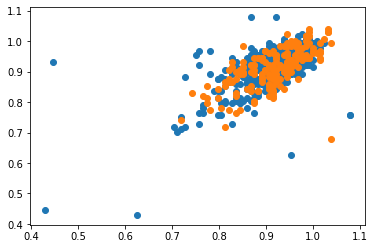

In [151]:
plot_lorenz(RRI_conv)
plot_lorenz(RRI_relax)

In [152]:
print(np.std(RRI_conv), np.std(RRI_relax))

0.06055931676365304 0.06540530397544905
